In [ ]:
class Solution(object):
    def sortArray(self, nums):
        def mergeSort(nums, s, e):
            if e - s <= 1:
                return nums[s:e]
            m = (s + e) // 2
            left = mergeSort(nums, s, m)
            right = mergeSort(nums, m, e)
            return merge(left, right)

        def merge(arr1, arr2):
            arr3 = []
            i, j = 0, 0
            while i < len(arr1) and j < len(arr2):
                if arr1[i] < arr2[j]:
                    arr3.append(arr1[i])
                    i += 1
                else:
                    arr3.append(arr2[j])
                    j += 1
            while i < len(arr1):
                arr3.append(arr1[i])
                i += 1
            while j < len(arr2):
                arr3.append(arr2[j])
                j += 1
            return arr3

        return mergeSort(nums, 0, len(nums))

In [3]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def mergeTwoLists(self, l1, l2):
        dummy = ListNode(0)
        current = dummy
        
        while l1 and l2:
            if l1.val < l2.val:
                current.next = l1
                l1 = l1.next
            else:
                current.next = l2
                l2 = l2.next
            current = current.next
        
        if l1:
            current.next = l1
        if l2:
            current.next = l2
        
        return dummy.next
    
    def mergeKLists(self, lists):
        if not lists:
            return None
        if len(lists) == 1:
            return lists[0]
        
        result = lists[0]
        for i in range(1, len(lists)):
            result = self.mergeTwoLists(result, lists[i])
        
        return result

In [1]:
class Solution(object):
    def findKthLargest(self, nums, k):
        def quickselect(left, right, k_smallest):
            if left == right:  
                return nums[left]  

            pivot_index = random.randint(left, right)
            pivot = nums[pivot_index]
            
            nums[pivot_index], nums[right] = nums[right], nums[pivot_index]

            store_index = left
            for i in range(left, right):
                if nums[i] < pivot:
                    nums[store_index], nums[i] = nums[i], nums[store_index]
                    store_index += 1

            nums[store_index], nums[right] = nums[right], nums[store_index]

            if k_smallest == store_index:
                return nums[store_index]
            elif k_smallest < store_index:
                return quickselect(left, store_index - 1, k_smallest)
            else:
                return quickselect(store_index + 1, right, k_smallest)

        return quickselect(0, len(nums) - 1, len(nums) - k)

In [1]:
class Solution(object):
    def sortColors(self, nums):
        left, right = 0, len(nums) - 1
        current = 0
        
        while current <= right:
            if nums[current] == 0:
                nums[current], nums[left] = nums[left], nums[current]
                left += 1
                current += 1
            elif nums[current] == 2:
                nums[current], nums[right] = nums[right], nums[current]
                right -= 1
            else:
                current += 1


Problem5:-Leetcode#147-Insertion Sort List-Medium

Given the head of a singly linked list, sort the list using insertion sort, and return the sorted list's head.

The steps of the insertion sort algorithm:

Insertion sort iterates, consuming one input element each repetition and growing a sorted output list.
At each iteration, insertion sort removes one element from the input data, finds the location it belongs within the sorted list and inserts it there.
It repeats until no input elements remain.

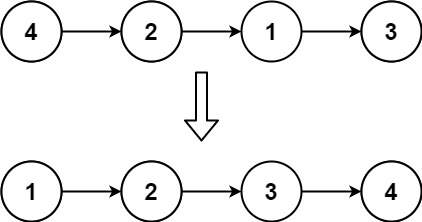

Input: head = [4,2,1,3]

Output: [1,2,3,4]

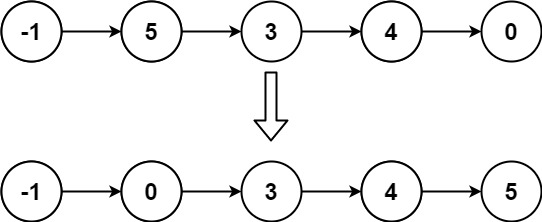


Input: head = [-1,5,3,4,0]

Output: [-1,0,3,4,5]

Example 3:

Input: head = []

Output: []

#Time: O(n^2)
#Space: O(1)

Add dummy_head before head will help us to handle the insertion easily

Use two pointers

last_sorted: last node of the sorted part, whose value is the largest of the sorted part

cur: next node of last_sorted, which is the current node to be considered

At the beginning, last_sorted is head and cur is head.next


When consider the cur node, there're 2 different cases


last_sorted.val <= cur.val: cur is in the correct order and can be directly move into the sorted part. In this case, we just move last_sorted one step forward


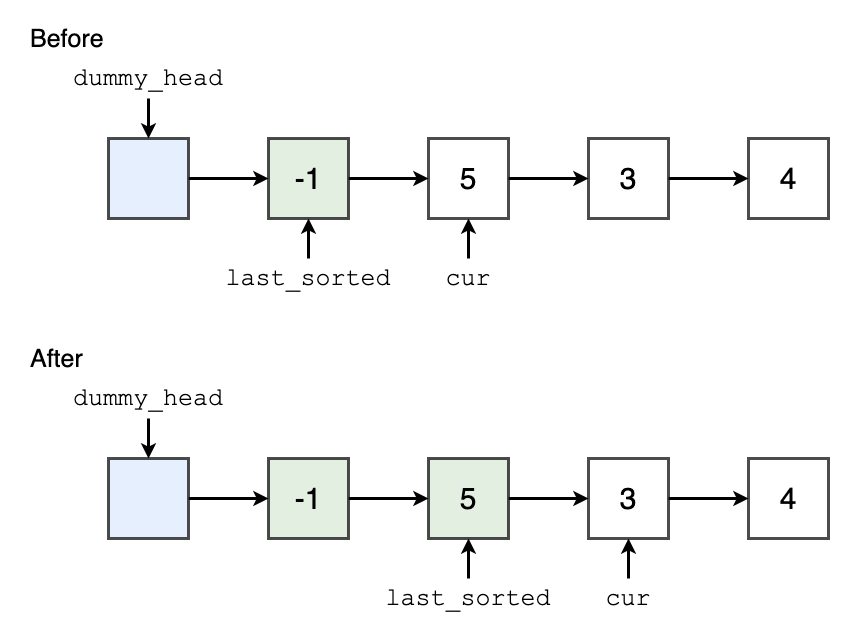

last_sorted.val > cur.val: cur needs to be inserted somewhere in the sorted part. In this case, we let prev start from dummy_head and iteratively compare prev.next.val and cur.val. If prev.next.val > cur.val, we insert cur between prev and prev.next

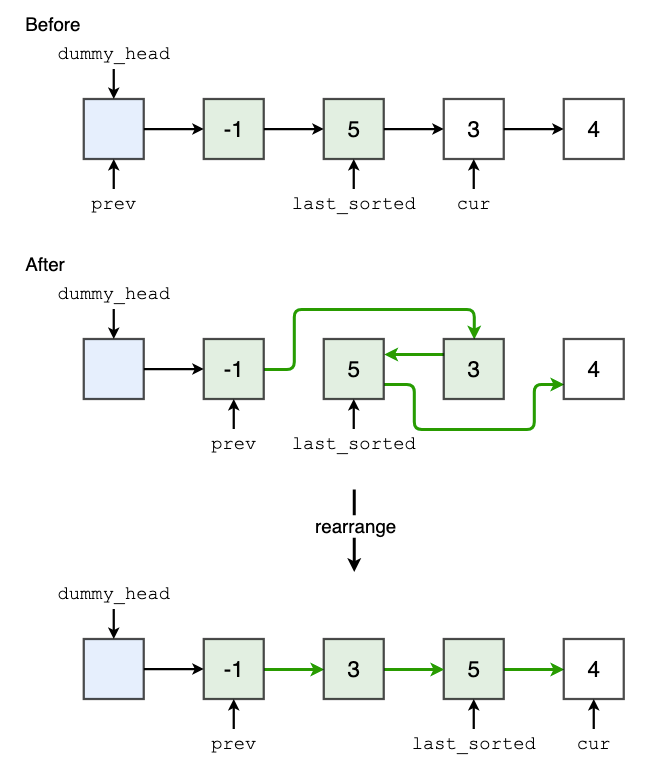

In [2]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution(object):
    def insertionSortList(self, head):
        sorted_list = ListNode(0)
        current = head

        while current:
            next_node = current.next
            prev = sorted_list
            pos = sorted_list.next

            while pos and pos.val < current.val:
                prev = pos
                pos = pos.next
            
            current.next = pos
            prev.next = current

            current = next_node

        return sorted_list.next

        return head


Problem6:-Leetcode#148-Sort List-Medium

Given the head of a linked list, return the list after sorting it in ascending order.

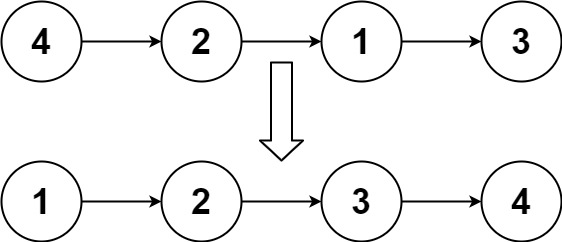

Input: head = [4,2,1,3]

Output: [1,2,3,4]


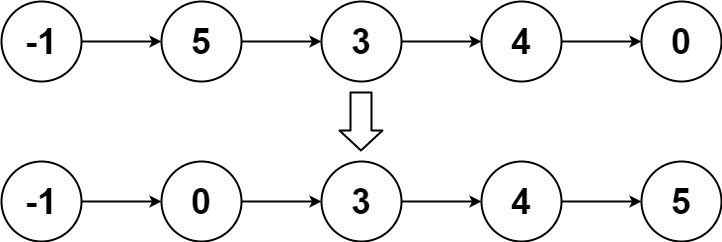

Input: head = [-1,5,3,4,0]

Output: [-1,0,3,4,5]

Example 3:

Input: head = []

Output: []

In [2]:
class Solution(object):
    def sortList(self, head):
        if not head or not head.next:
            return head
        mid = self.getMid(head)
        left = self.sortList(head)
        right = self.sortList(mid)
        return self.merge(left, right)

    def merge(self, list1, list2):
        dummyHead = ListNode(0)
        tail = dummyHead
        while list1 and list2:
            if list1.val < list2.val:
                tail.next = list1
                list1 = list1.next
            else:
                tail.next = list2
                list2 = list2.next
            tail = tail.next
        tail.next = list1 if list1 else list2
        return dummyHead.next
    
    def getMid(self, head):
        midPrev = None
        while head and head.next:
            midPrev = head if not midPrev else midPrev.next
            head = head.next.next
        mid = midPrev.next
        midPrev.next = None
        return mid